# Coin Toss Example: Is the Coin Fair?

In this notebook we'll model the process of flipping a potentially unfair coin using PyMC3. We'll pass some data with a known bias to the PyMC3 model and see how well it infers the bias in the observed data.

This example is adapted from Martin, Osvaldo, *Bayesian Analysis with Python: Introdcution to Statistical Modeling and Probabilistic Programming Using PyMC3 and ArviZ*, 2nd edition, Packt Publishing, 2018.

### Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pymc3 as pm
import arviz as az

### Generating simulated experimental data
The Bernoulli distribution is a discrete distribution having two possible outcomes: 1 (True) and 0 (False).  The probability mass function is given by:

$$f(x) = p^{x} (1-p)^{1-x}$$

$$\text{p is the probability of a True value (1)}$$

We'll use the SciPy library to generate some biased coin toss data, and pretend we don't know the bias:


In [5]:
np.random.seed(123) # <== gives the same results each time we run it
trials = 100
theta_real = 0.55   # <== probability of heads
data = stats.bernoulli.rvs(p=theta_real, size=trials)  # <== generate random values using scipy
data[:50]                                              # <== display first 50 values 

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

### 1. Define the likelihood function

The likelihood function describes probability of heads (a 1 value). We'll use the same Bernoulli distribution we used before, which takes a parameter p specifying the probability of heads. Since we have experimental data and would like to infer the probability parameter, we'll pass the previously generated data using the "observed" keyword argument, and define the probability in terms a prior probability distribution. The likelihood function is defined in the model below.

    y = pm.Bernoulli('y', p=θ, observed=data)

### 2. Define the prior

We'll define a prior for p (probability of heads) using the beta distribution. The beta distribution is restricted to the interval [0, 1], which coincides with the range of possible values p can take.  In addition, the beta distribution takes two parameters, alpha and beta, that allow it to take on a wide variety of shapes, as seen in the figure below, which is from Martin:


![title](img/Beta.png)

We'll use alpha=1.0 and beta=1.0, which is effectively a uniform distribution.

### 3. Set up the model and run the inference engine to find θ

In [6]:
with pm.Model() as coin_model:
    θ = pm.Beta('θ', alpha=1., beta=1.)        # <== prior for θ; equivalent to a uniform distribution
    y = pm.Bernoulli('y', p=θ, observed=data)  # <== likelihood function
    trace = pm.sample(1000, random_seed=123)   # <== let PyMC3 select the inference algorithm

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
100%|██████████| 1500/1500 [00:00<00:00, 2297.51it/s]


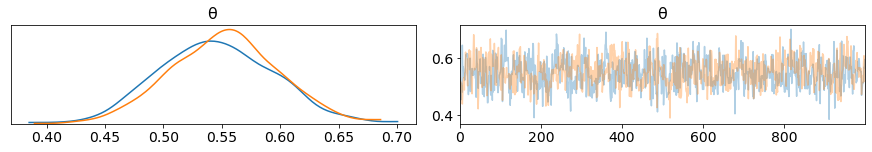

In [7]:
az.plot_trace(trace);

In [8]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.549,0.048,0.46,0.636,0.002,0.001,582.0,576.0,582.0,1156.0,1.0


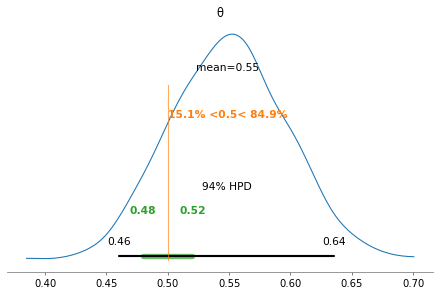

In [10]:
az.plot_posterior(trace, textsize=10, rope=[0.48, 0.52], ref_val=0.5);

### Conclusion

With only 100 data points, there is still a significant possibility the coin IS fair.  With more data, the coin is clearly unfair.